# Medical Appointment No Shows Capstone

# 5. MODELING

In [2]:
import os
import pandas as pd
import numpy as np
from datetime import datetime

import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [53]:
#MODEL_SELECTION
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

In [65]:
#LINEAR_MODEL
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

In [69]:
#METRICS
from sklearn.metrics import mean_squared_error, r2_score 
from sklearn.metrics import classification_report, confusion_matrix


In [3]:
path = 'data/step4_output.csv'
df = pd.read_csv(path, index_col=None) 
df.head()

,PatientId,AppointmentID,Gender,ScheduledDay,AppointmentDay,Age,Neighborhood,Scholarship,Hypertension,Diabetes,Alcoholism,Handicap,SMSSent,NoShow
0,29872499824296,5642903,0,2016-04-29 18:38:08+00:00,2016-04-29 00:00:00+00:00,62,JARDIM DA PENHA,0,1,0,0,0,0,0
1,558997776694438,5642503,1,2016-04-29 16:08:27+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,0,0,0,0,0,0
2,4262962299951,5642549,0,2016-04-29 16:19:04+00:00,2016-04-29 00:00:00+00:00,62,MATA DA PRAIA,0,0,0,0,0,0,0
3,867951213174,5642828,0,2016-04-29 17:29:31+00:00,2016-04-29 00:00:00+00:00,8,PONTAL DE CAMBURI,0,0,0,0,0,0,0
4,8841186448183,5642494,0,2016-04-29 16:07:23+00:00,2016-04-29 00:00:00+00:00,56,JARDIM DA PENHA,0,1,1,0,0,0,0


In [20]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110517 entries, 0 to 110516
Data columns (total 14 columns):
 #   Column          Non-Null Count   Dtype 
---  ------          --------------   ----- 
 0   PatientId       110517 non-null  int64 
 1   AppointmentID   110517 non-null  int64 
 2   Gender          110517 non-null  int64 
 3   ScheduledDay    110517 non-null  object
 4   AppointmentDay  110517 non-null  object
 5   Age             110517 non-null  int64 
 6   Neighborhood    110517 non-null  object
 7   Scholarship     110517 non-null  int64 
 8   Hypertension    110517 non-null  int64 
 9   Diabetes        110517 non-null  int64 
 10  Alcoholism      110517 non-null  int64 
 11  Handicap        110517 non-null  int64 
 12  SMSSent         110517 non-null  int64 
 13  NoShow          110517 non-null  int64 
dtypes: int64(11), object(3)
memory usage: 11.8+ MB


<AxesSubplot:>

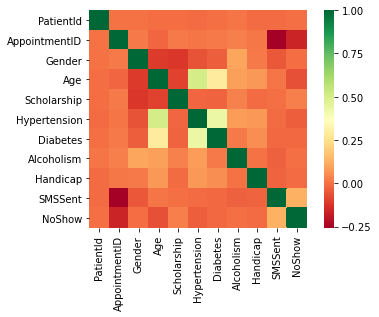

In [32]:
sns.heatmap(df.corr(), square=True, cmap='RdYlGn')

In [34]:
# Split into training and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state=42, stratify=y)

## 1. K-NEAREST NEIGHBORS ALGORITHM

In [71]:
from sklearn.neighbors import KNeighborsClassifier

#Create feature and target arrays
X = df.drop('Gender', axis=1).values
y = df['NoShow'].values

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.40,random_state=42)


# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Print the accuracy
print(knn.score(X_test, y_test))

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)


# Predict and print the label for the new data point X_new
new_prediction = knn.predict(X_new)
print("Prediction: {}".format(new_prediction))

# Print the accuracy
print(knn.score(X_test, y_test))



# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

ValueError: could not convert string to float: '2016-05-31 11:01:39+00:00'

In [ ]:
# Import necessary modules
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix


# Create training and test set

X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.40,random_state=42)

# Instantiate a k-NN classifier: knn
knn = KNeighborsClassifier(n_neighbors=6)

# Fit the classifier to the training data
knn.fit(X_train,y_train)

# Predict the labels of the test data: y_pred
y_pred = knn.predict(X_test)

# Generate the confusion matrix and classification report
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))

In [ ]:
# Setup arrays to store train and test accuracies
neighbors = np.arange(1, 9)
train_accuracy = np.empty(len(neighbors))
test_accuracy = np.empty(len(neighbors))

# Loop over different values of k
for i, k in enumerate(neighbors):
    # Setup a k-NN Classifier with k neighbors: knn
    knn = KNeighborsClassifier(n_neighbors=k)

    # Fit the classifier to the training data
    knn.fit(X_train, y_train)
    
    #Compute accuracy on the training set
    train_accuracy[i] = knn.score(X_train,y_train)

    #Compute accuracy on the testing set
    test_accuracy[i] = knn.score(X_test, y_test)

# Generate plot
plt.title('k-NN: Varying Number of Neighbors')
plt.plot(neighbors, test_accuracy, label = 'Testing Accuracy')
plt.plot(neighbors, train_accuracy, label = 'Training Accuracy')
plt.legend()
plt.xlabel('Number of Neighbors')
plt.ylabel('Accuracy')
plt.show()


### Reshape

In [37]:
import numpy as np
import pandas as pd

#df = pd.read_csv('')

# Create arrays for features and target variable
y = df.NoShow.values
X = df.Gender.values

# Print the dimensions of X and y before reshaping
print("Dimensions of y before reshaping: {}".format(y.shape))
print("Dimensions of X before reshaping: {}".format(X.shape))

# Reshape X and y
y = y.reshape(-1,1)
X = X.reshape(-1,1)

# Print the dimensions of X and y after reshaping
print("Dimensions of y after reshaping: {}".format(y.shape))
print("Dimensions of X after reshaping: {}".format(X.shape))


Dimensions of y before reshaping: (110517,)
Dimensions of X before reshaping: (110517,)
Dimensions of y after reshaping: (110517, 1)
Dimensions of X after reshaping: (110517, 1)


## 2. LINEAR REGRESSION MODEL

In [43]:
# Subsetting our data into our dependent and independent variables.
X = df[["Gender"]] 
y = df[["NoShow"]]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.25, random_state = 123)

In [44]:
# We now want to check the shape of the X train, y_train, X_test and y_test to make sure the proportions are right. 
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(82887, 1) (82887, 1)
(27630, 1) (27630, 1)


In [45]:
#from sklearn.linear_model import LinearRegression

linreg_model = LinearRegression(normalize=True)
linreg_model.fit(X_train, y_train)

# Evaluate the model  
print(linreg_model.score(X_train,y_train))

4.691560864966693e-05


In [46]:
#model to make predictions about our test data
y_pred = linreg_model.predict(X_test)

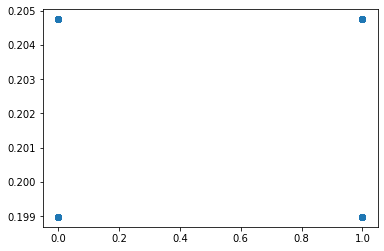

In [47]:
# Let's plot the predictions against the actual result. Use scatter()
plt.scatter(y_test, y_pred)

In [51]:
# Compute and print R^2 and RMSE
print("R^2: {}".format(linreg_model.score(X_test, y_test)))
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("Root Mean Squared Error: {}".format(rmse))

R^2: -0.00017574899166206137
Root Mean Squared Error: 0.3996001438387235


In [56]:
# Perform 3-fold CV
cvscores_3 =   cross_val_score(linreg_model, X, y, cv=3)
print(np.mean(cvscores_3))

# Perform 10-fold CV
cvscores_10 =  cross_val_score(linreg_model,X,y,cv=10)
print(np.mean(cvscores_10))

# Compute 5-fold cross-validation scovres: cv_scores
cv_scores = cross_val_score(linreg_model, X, y, cv=5)

# Print the 5-fold cross-validation scores
print(cv_scores)

print("Average 5-Fold CV Score: {}".format(np.mean(cv_scores)))

-0.0018233137666655945
-0.0023018313371608646
[-1.45387397e-05 -1.49349194e-03 -3.82784641e-03 -3.13679828e-03
 -1.79806541e-03]
Average 5-Fold CV Score: -0.00205414815773044


In [ ]:
from sklearn.linear_model import Ridge
from sklearn.model_selection import cross_val_score

# Use stock symbols to extract training data
X = all_prices[['ebay','nvideia','yahoo']]
y = all_prices[['apple']]

# Fit and score the model with cross-validation
scores = cross_val_score(Ridge(),X,y, cv=3)
print(scores)

### LASSO

In [ ]:
# Instantiate a lasso regressor: lasso
lasso = Lasso(alpha=0.4,normalize=True)

# Fit the regressor to the data
lasso.fit(X,y)

# Compute and print the coefficients
lasso_coef = lasso.fit(X,y).coef_
print(lasso_coef)

# Plot the coefficients
plt.plot(range(len(df)), lasso_coef)
plt.xticks(range(len(df)), df_columns.values, rotation=60)
plt.margins(0.02)
plt.show()

### RIDGE

In [67]:
def display_plot(cv_scores, cv_scores_std):
    fig = plt.figure()
    ax = fig.add_subplot(1,1,1)
    ax.plot(alpha_space, cv_scores)

    std_error = cv_scores_std / np.sqrt(10)

    ax.fill_between(alpha_space, cv_scores + std_error, cv_scores - std_error, alpha=0.2)
    ax.set_ylabel('CV Score +/- Std Error')
    ax.set_xlabel('Alpha')
    ax.axhline(np.max(cv_scores), linestyle='--', color='.5')
    ax.set_xlim([alpha_space[0], alpha_space[-1]])
    ax.set_xscale('log')
    plt.show()

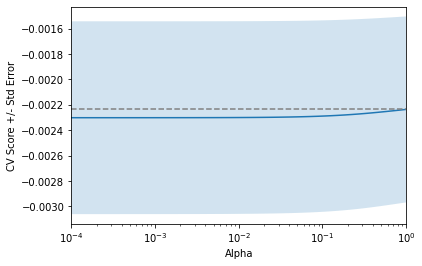

In [68]:
# Setup the array of alphas and lists to store scores
alpha_space = np.logspace(-4, 0, 50)
ridge_scores = []
ridge_scores_std = []

# Create a ridge regressor: ridge
ridge = Ridge(normalize=True)

# Compute scores over range of alphas
for alpha in alpha_space:

    # Specify the alpha value to use: ridge.alpha
    ridge.alpha = alpha
    
    # Perform 10-fold CV: ridge_cv_scores
    ridge_cv_scores = cross_val_score(ridge, X,y,cv=10)
    
    # Append the mean of ridge_cv_scores to ridge_scores
    ridge_scores.append(np.mean(ridge_cv_scores))
    
    # Append the std of ridge_cv_scores to ridge_scores_std
    ridge_scores_std.append(np.std(ridge_cv_scores))

# Display the plot
display_plot(ridge_scores, ridge_scores_std)

## 3. LOGISTIC REGRESSION

In [ ]:

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Split the data into a training and test set.
X_train, X_test, y_train, y_test = train_test_split(df[['Height','Weight']].values, 
                                              (df.Gender == "Male").values,
                                              random_state=5)

# Create logistic regression object
reg = LogisticRegression(solver='lbfgs')

# Fit the model on the training data.
reg.fit(X_train, y_train)

# Print the accuracy from the testing data.
print(accuracy_score(reg.predict(X_test), y_test))

## 2. 

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import confusion_matrix

In [ ]:
from sklearn.ensemble import RandomForestClassifier
model = RandomForestClassifier(random_state=42).fit(X_train, y_train)
model.score(X_test,y_test)

In [ ]:
from sklearn.metrics import confusion_matrix
confusion_matrics(y_test,model.predict(X_test))

In [ ]:
from sklearn.metrics import precision_score, recall_score, f1_score

In [ ]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [10,200],
    'max_features': ['auto','sqrt','log2',0.5],
}

gs = GridSearchCV(estimator=model, param_grid=param_grid,\
                 scoring='recall',n_jobs=-1)
gs.fit(X_train,y_train)
recall_score(y_test,gs.best_estimator_.predict(X_test))

In [ ]:
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_curve, roc_auc_score, \
    precision_recall_curve, auc
import seaborn as sns
%matplotlib inline 
%config InlineBackend.figure_format = 'svg'
X,y = make_classification(n_samples=10000, n_classes=2, \
                         weights =[0.95,0.05],random_state=42)
X_train, X_test, y_train,y_test = train_test_split(X,y,test_size=.2,\
                                                  random_state=2)
model = LogisticRegression().fit(X_train,y_train)

probs = model.predict_proba(X_test)
probs = probs[:,1]

In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(train, targets,\
                                              test_size=0.2, \
                                              random_state=42)
model=RandomForestRegressor(max_features=.5,n_estimators=20)
model.fit(X_train,y_train)
model.score(X_test,y_test)

In [ ]:
from sklearn.svm import LinearSVC

# Construct data for the model
X = df[['Age', 'Neighborhood']]
y = df[['Age']]

model = LinearSVC() 
#Fit X(Training Data), y(Labels for each datapoint)
model.fit(X,y)

#Investigate what kind of patterns the data found
model.coef_

# Predict with the model
predictions = model.predict(X_test)
print(predictions)

# Create input array
X_predict = targets[['petal length (cm)', 'petal width (cm)']]



# Visualize predictions and actual values
plt.scatter(X_predict['petal length (cm)'], X_predict['petal width (cm)'],
            c=predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.show()

In [ ]:
from sklearn import linear_model

# Prepare input and output DataFrames
X = boston[['AGE']]
y = boston[['RM']]

# Fit the model
model = linear_model.LinearRegression()
model.fit(X,y)


# Generate predictions with the model using those inputs
predictions = model.predict(new_inputs.reshape([-1,1]))

# Visualize the inputs and predicted values
plt.scatter(new_inputs, predictions, color='r', s=3)
plt.xlabel('inputs')
plt.ylabel('predictions')
plt.show()